# **Módulo: Aprendizaje no supervisado**
**Reto | Segmentación de datos empleados**
---

In [2]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#2.Carga los datos del archivo
df= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data16/Train.csv')
#df3 =  df[['Employee_ID', 'Gender','Relationship_Status']]
#df3

In [5]:
#Reemplazar datos faltantes
df2 = df.copy(deep=True)
df2['Age'] = df2['Age'].fillna(df2['Age'].mode()[0])
df2['Time_of_service'] = df2['Time_of_service'].fillna(df2['Time_of_service'].mode()[0])
df2['Pay_Scale'] = df2['Pay_Scale'].fillna(df2['Pay_Scale'].mode()[0])

df2['Work_Life_balance'] = df2['Work_Life_balance'].fillna(df2['Work_Life_balance'].mode()[0])
df2['VAR2'] = df2['VAR2'].fillna(df2['VAR2'].mode()[0])
df2['VAR4'] = df2['VAR4'].fillna(df2['VAR4'].mode()[0])

#Eliminamos los que no haya localizado
df2.dropna()



Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_23371      F  42.0                4             Married   
1      EID_18000      M  24.0                3              Single   
2       EID_3891      F  58.0                3             Married   
3      EID_17492      F  26.0                3              Single   
4      EID_22534      F  31.0                1             Married   
...          ...    ...   ...              ...                 ...   
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown                       Unit Decision_skill_possess  \
0        Franklin                         IT             Conceptual   
1     Springfield                  Logistics             Analytical   
2         Clinton                    Quality             Conceptual   
3         Lebanon  Human Resource Management             Behavioral   
4     Springfield                  Logistics             Conceptual   
...           ...                        ...                    ...   
6995     Franklin                 Operarions             Behavioral   
6996      Lebanon                        R&D             Analytical   
6997  Springfield                         IT              Directive   
6998   Washington                      Sales             Behavioral   
6999     Franklin                         IT              Directive   

      Time_of_service  Time_since_promotion  ...  Compensation_and_Benefits  \
0                 4.0                     4  ...                      type2   
1                 5.0                     4  ...                      type2   
2                27.0                     3  ...                      type2   
3                 4.0                     3  ...                      type2   
4                 5.0                     4  ...                      type3   
...               ...                   ...  ...                        ...   
6995              4.0                     1  ...                      type3   
6996             16.0                     2  ...                      type3   
6997             10.0                     1  ...                      type2   
6998             24.0                     1  ...                      type0   
6999             22.0                     2  ...                      type2   

      Work_Life_balance  VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  \
0                   3.0     4  0.7516  1.8688   2.0     4     5     3   
1                   4.0     3 -0.9612 -0.4537   2.0     3     5     3   
2                   1.0     4 -0.9612 -0.4537   3.0     3     8     3   
3                   1.0     3 -1.8176 -0.4537   2.0     3     7     3   
4                   3.0     1  0.7516 -0.4537   2.0     2     8     2   
...                 ...   ...     ...     ...   ...   ...   ...   ...   
6995                3.0     1  0.7516 -0.4537   2.0     3     7     3   
6996                3.0     2 -0.1048 -2.7762   2.0     4     8     4   
6997                4.0     2 -0.1048 -0.4537   2.0     4     8     3   
6998                2.0     4  0.7516  1.8688   2.0     3     6     3   
6999                3.0     3 -0.1048 -1.6150   3.0     4     5     3   

      Attrition_rate  
0             0.1841  
1             0.0670  
2             0.0851  
3             0.0668  
4             0.1827  
...              ...  
6995          0.7839  
6996          0.1055  
6997          0.7847  
6998          0.4162  
6999          0.0910  

[7000 rows x 24 columns]

In [6]:
df_processed = df2.copy(deep=True)

# Drop 'Employee_ID' as it's typically an identifier and not used in clustering
df_processed.drop('Employee_ID', axis=1, inplace=True)

# Handle 'Gender' using OneHotEncoder as was being done previously
enc_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_gender_encoded = enc_gender.fit_transform(df_processed[['Gender']])
gender_categories = enc_gender.categories_[0]
for i, val in enumerate(gender_categories):
  df_processed['Gender_' + str(val)] = X_gender_encoded[:, i]
df_processed.drop('Gender', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle 'Relationship_Status' using OneHotEncoder as was being done previously
enc_Rel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_rel_encoded = enc_Rel.fit_transform(df_processed[['Relationship_Status']])
rel_categories = enc_Rel.categories_[0]
for i, val in enumerate(rel_categories):
  df_processed['Relationship_Status_' + str(val)] = X_rel_encoded[:, i]
df_processed.drop('Relationship_Status', axis=1, inplace=True) # Drop the original 'Gender' column

# Handle all other remaining object type columns using OrdinalEncoder
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col] = OrdinalEncoder().fit_transform(df_processed[[col]])




# Now, all columns should be numeric
X_train = df_processed.to_numpy()
X_train


array([[42.,  4.,  1., ...,  0.,  1.,  0.],
       [24.,  3.,  3., ...,  1.,  0.,  1.],
       [58.,  3.,  0., ...,  0.,  1.,  0.],
       ...,
       [49.,  3.,  3., ...,  0.,  0.,  1.],
       [47.,  3.,  4., ...,  0.,  1.,  0.],
       [58.,  3.,  1., ...,  0.,  1.,  0.]])

In [7]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7000 non-null   float64
 1   Education_Level              7000 non-null   int64  
 2   Hometown                     7000 non-null   float64
 3   Unit                         7000 non-null   float64
 4   Decision_skill_possess       7000 non-null   float64
 5   Time_of_service              7000 non-null   float64
 6   Time_since_promotion         7000 non-null   int64  
 7   growth_rate                  7000 non-null   int64  
 8   Travel_Rate                  7000 non-null   int64  
 9   Post_Level                   7000 non-null   int64  
 10  Pay_Scale                    7000 non-null   float64
 11  Compensation_and_Benefits    7000 non-null   float64
 12  Work_Life_balance            7000 non-null   float64
 13  VAR1              

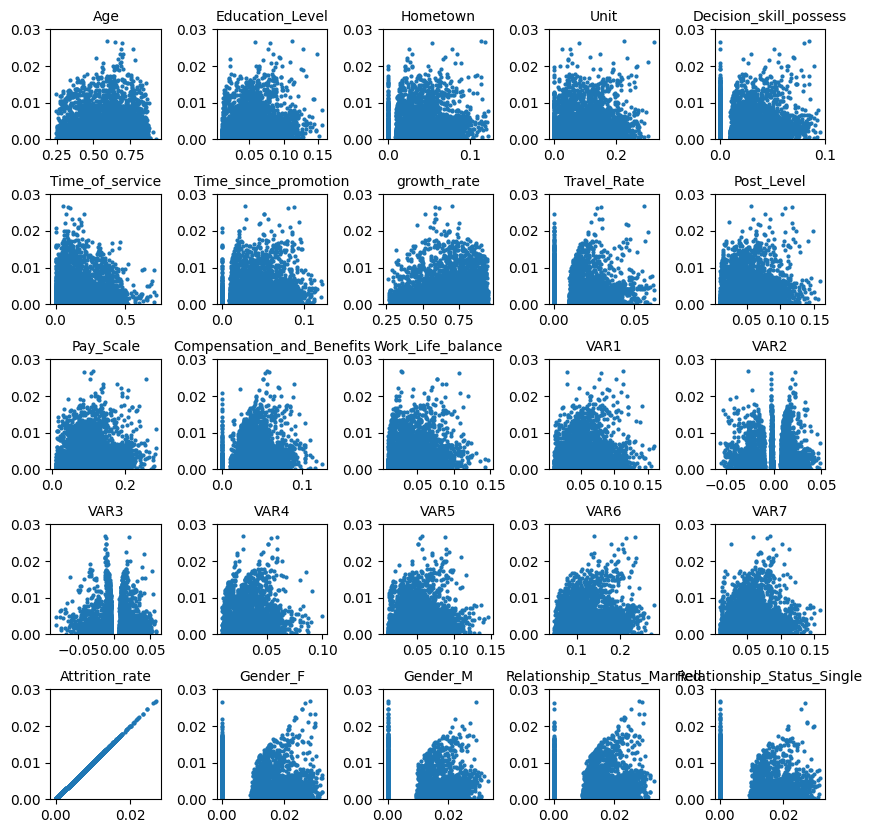

In [8]:
# Normalizar
X1 = Normalizer().fit_transform(X_train)

v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X1[:,v], X1[:,20],s=4)
    axs[i,j].set_title(df_processed.columns[v],fontsize=10)
    axs[i,j].set_ylim([0 ,0.03])
    v+=1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

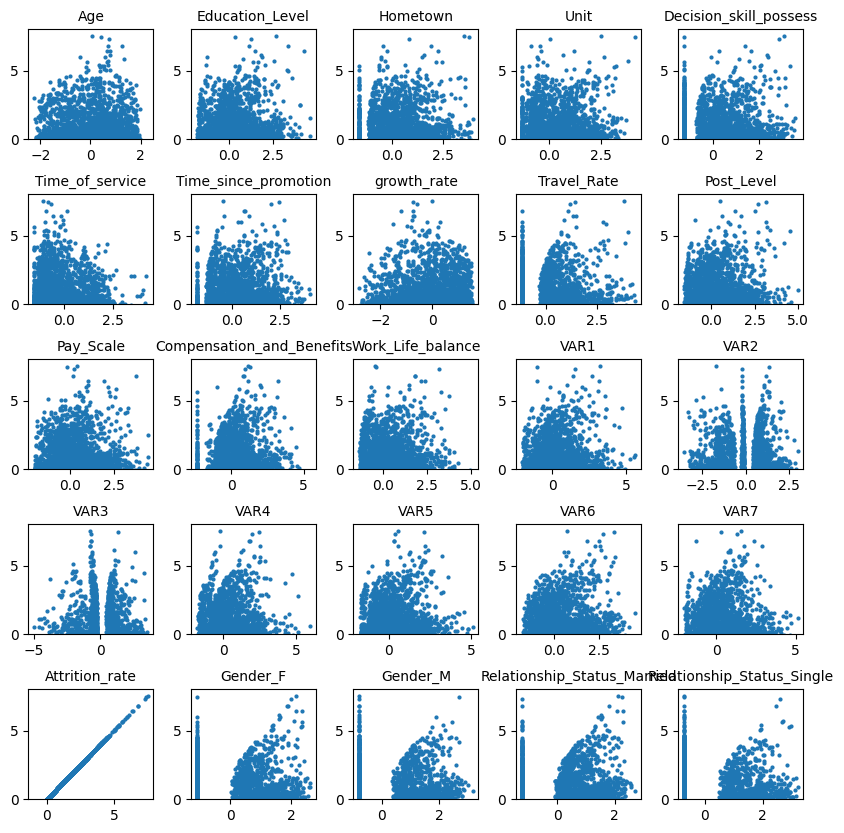

In [9]:
#X2 = StandardScaler().fit_transform(X_train)
X2 = StandardScaler().fit_transform(X1)
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(X2[:,v], X2[:,20],s=4)
    axs[i,j].set_title(df_processed.columns[v],fontsize=10)
    axs[i,j].set_ylim([0,8])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [10]:
np.random.seed(0)
f = 11
t = 'Compensation_and_Benefits'
nc = 25

In [11]:
#X2 = StandardScaler().fit_transform(X_train)
#X2 = StandardScaler().fit_transform(X1)

results_km = {}
results_sl = {}
results_sc = {}

for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  results_km[k] = metrics.silhouette_score(X2, y_pred)

  y_pred2 = cluster.AgglomerativeClustering(linkage="single", n_clusters=k).fit_predict(X2)
  results_sl[k] = metrics.silhouette_score(X2, y_pred2)

  y_pred3 = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors").fit_predict(X2)
  results_sc[k] = metrics.silhouette_score(X2, y_pred3)

clusters_counts_km = list(results_km.keys())
index_values_km = list(results_km.values())

clusters_counts_sl = list(results_sl.keys())
index_values_sl = list(results_sl.values())

clusters_counts_sc = list(results_sc.keys())
index_values_sc = list(results_sc.values())

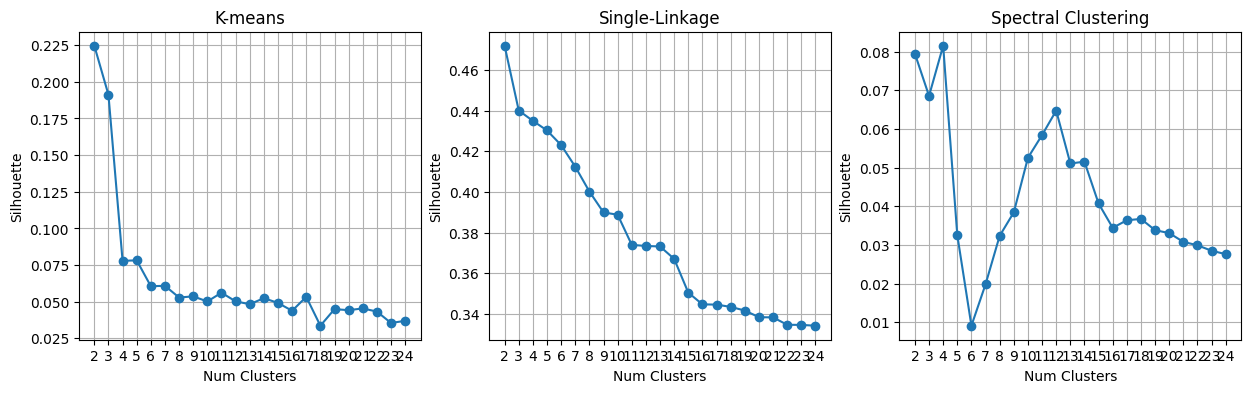

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.plot(clusters_counts_km, index_values_km, 'o-')
ax0.grid(True)
ax0.set_title('K-means')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts_km)
ax0.set_ylabel('Silhouette')

ax1.plot(clusters_counts_sl, index_values_sl, 'o-')
ax1.grid(True)
ax1.set_title('Single-Linkage')
ax1.set_xlabel('Num Clusters')
ax1.set_xticks(clusters_counts_sl)
ax1.set_ylabel('Silhouette')

ax2.plot(clusters_counts_sc, index_values_sc, 'o-')
ax2.grid(True)
ax2.set_title('Spectral Clustering')
ax2.set_xlabel('Num Clusters')
ax2.set_xticks(clusters_counts_sc)
ax2.set_ylabel('Silhouette')

plt.show()

In [13]:
#Índice Calinski-Harabasz
y_preds = []
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X2, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

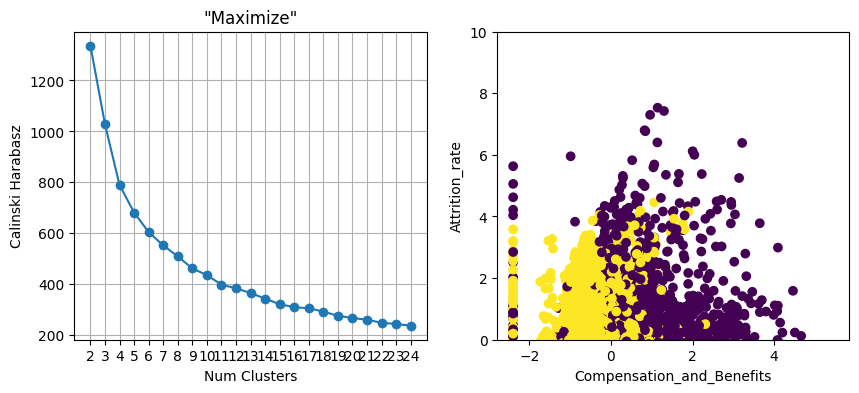

In [14]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X2[:, 11], X2[:, 20], c=y_preds[0])
ax1.set_ylim(0, 10)
ax1.set_xlabel(t)
ax1.set_ylabel('Attrition_rate')

plt.show()

/tmp/ipython-input-2215928876.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0, ax1) = plt.subplots(1, 2)


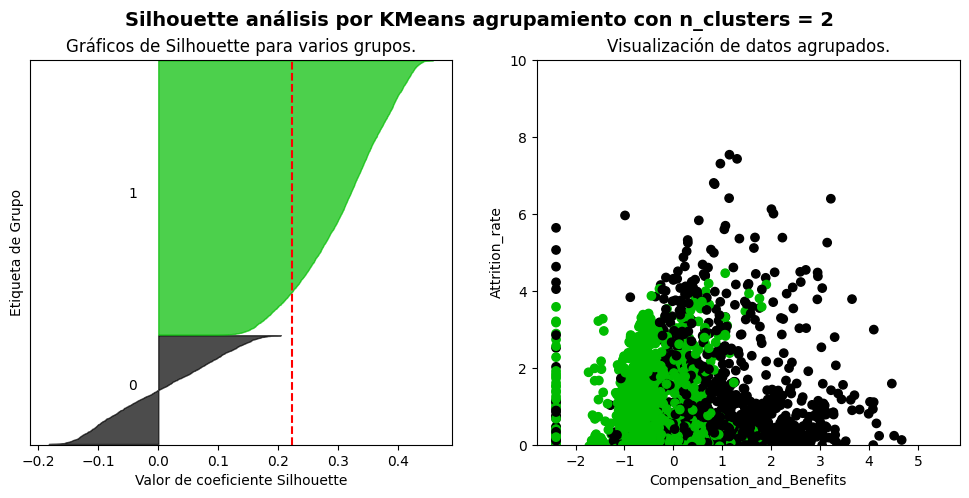

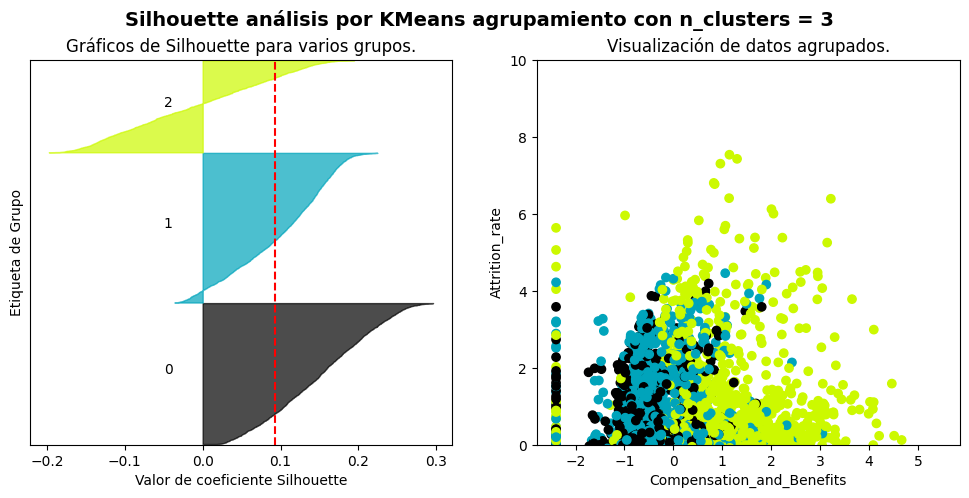

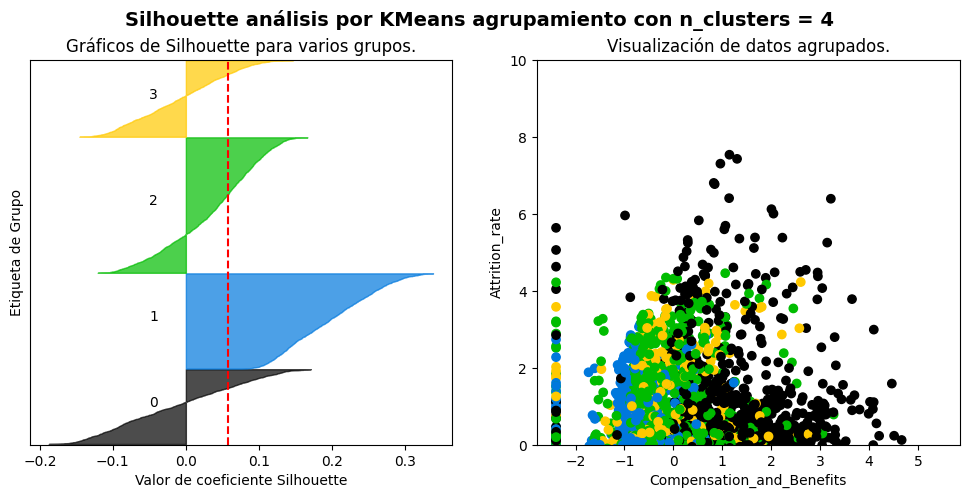

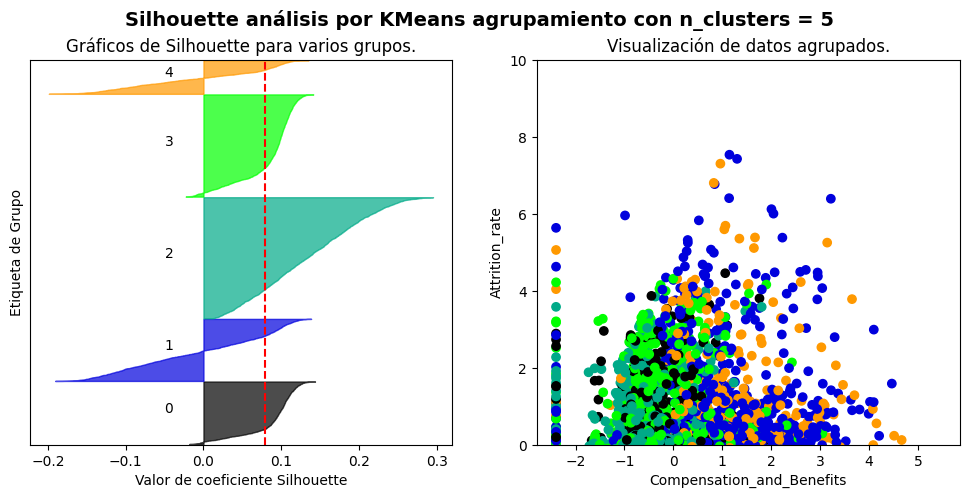

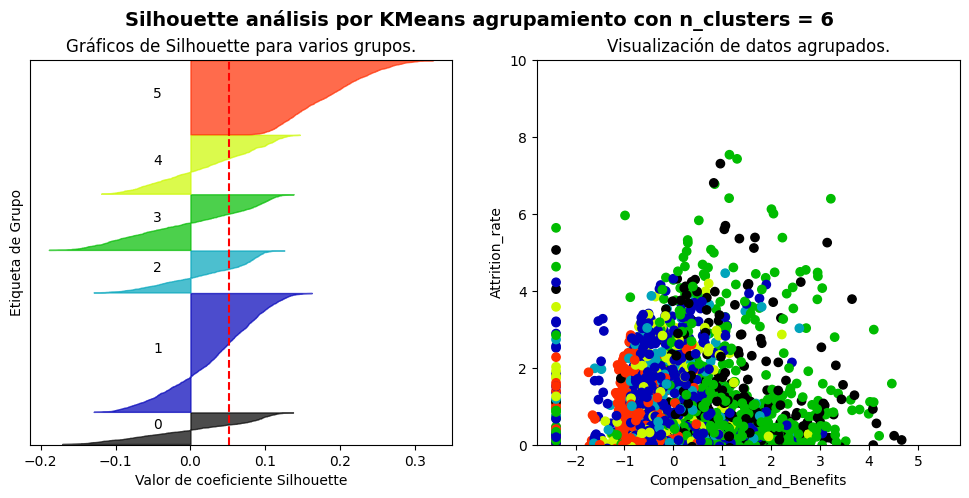

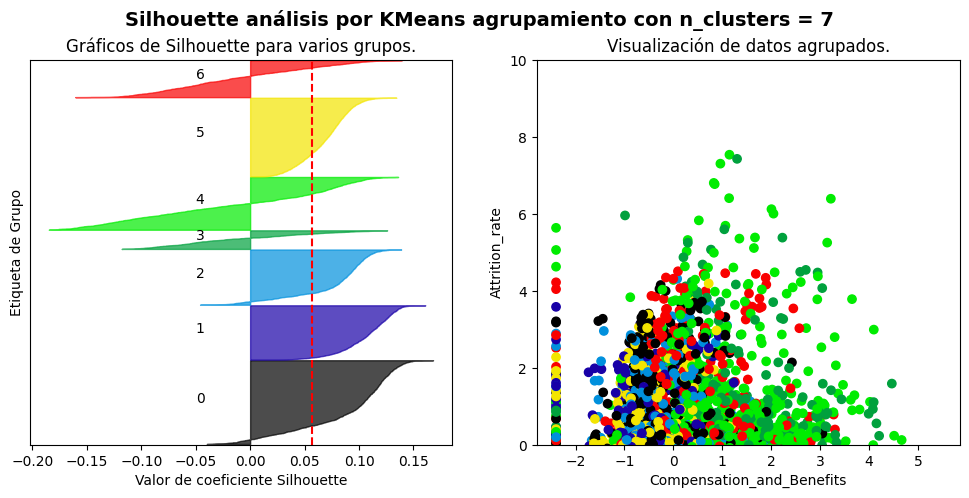

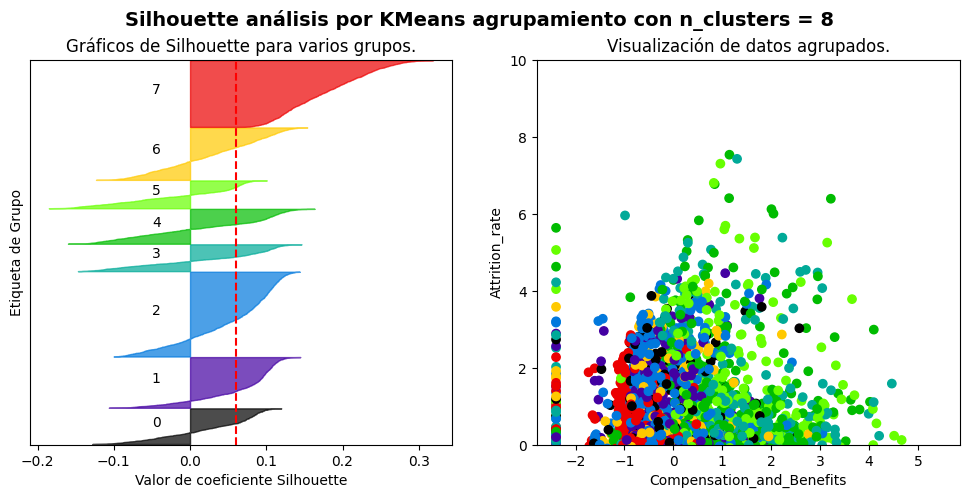

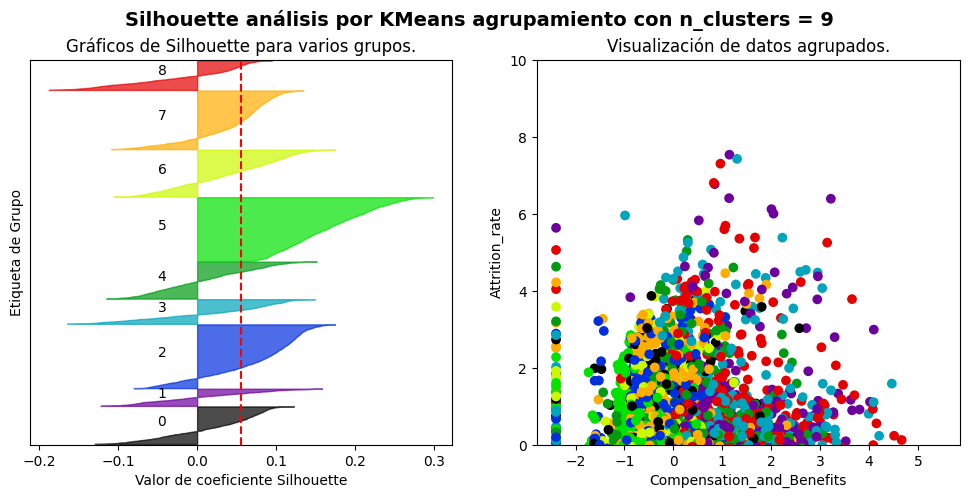

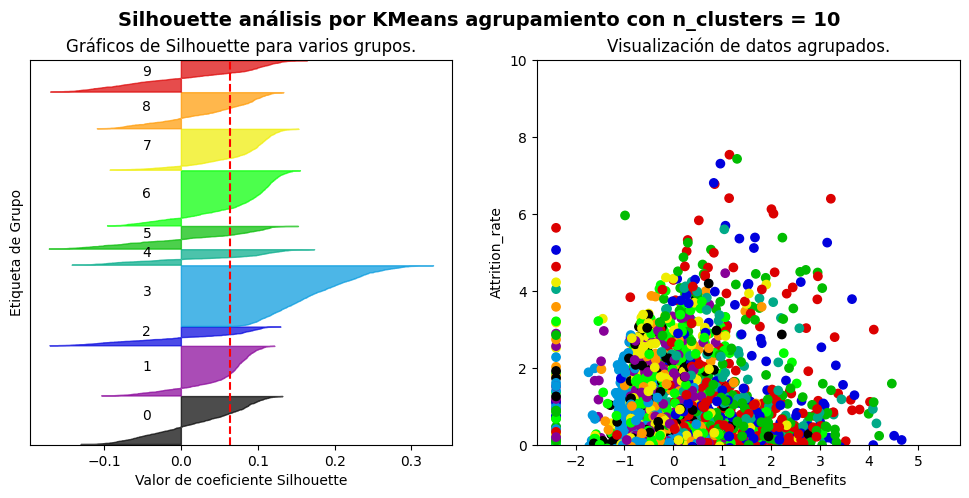

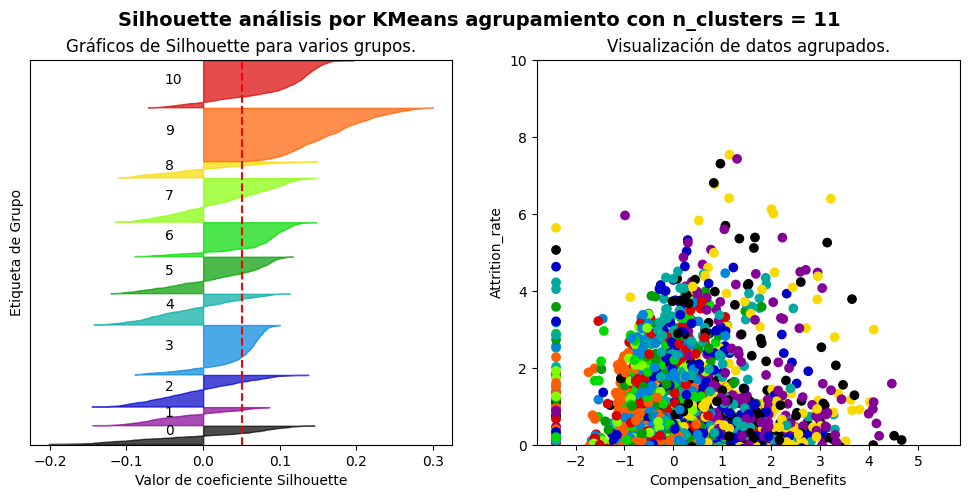

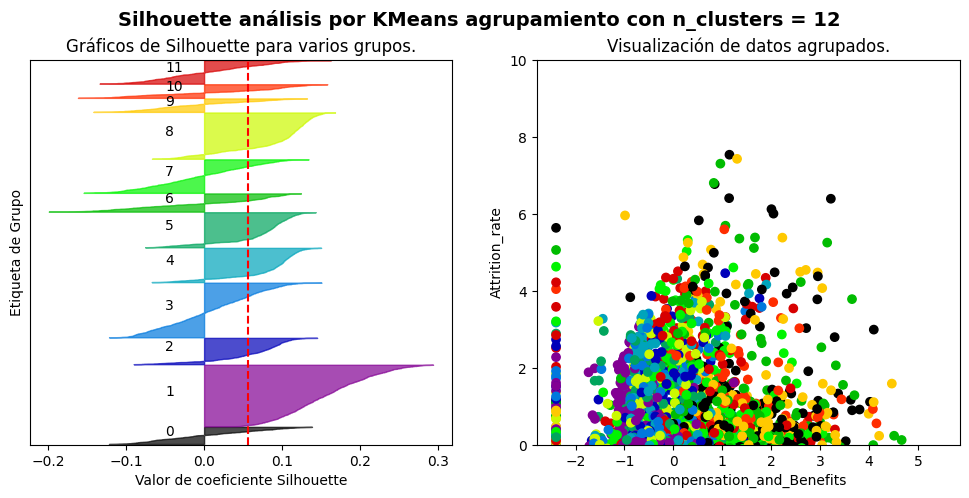

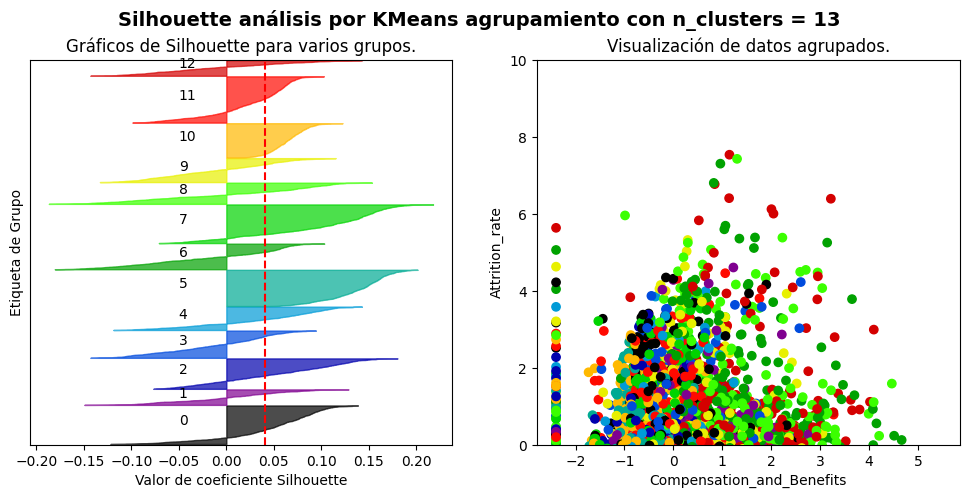

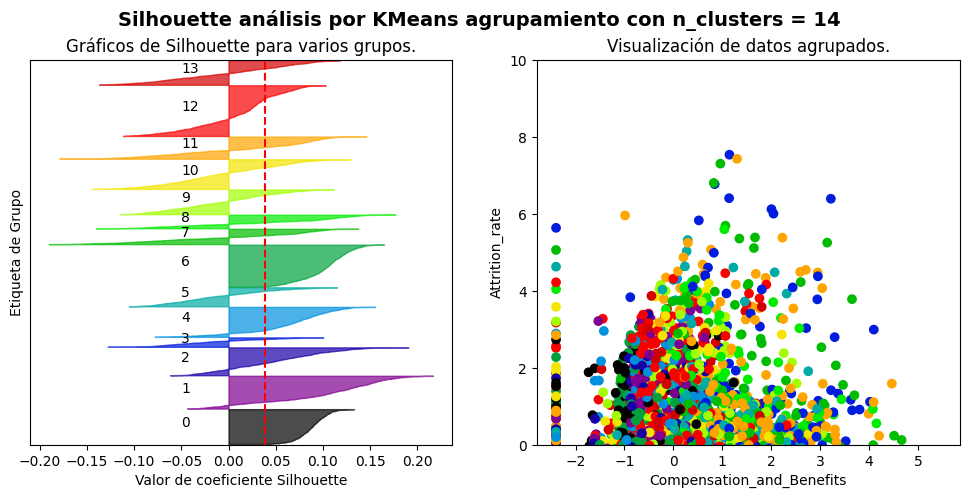

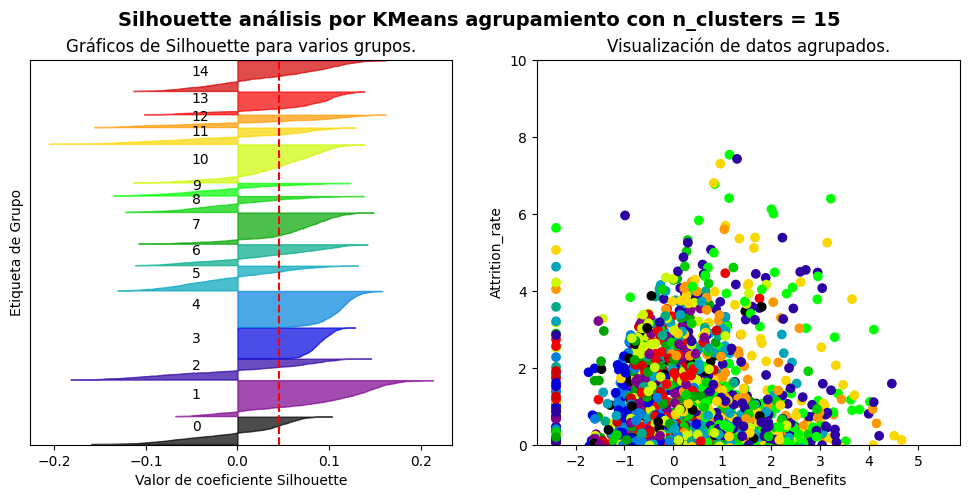

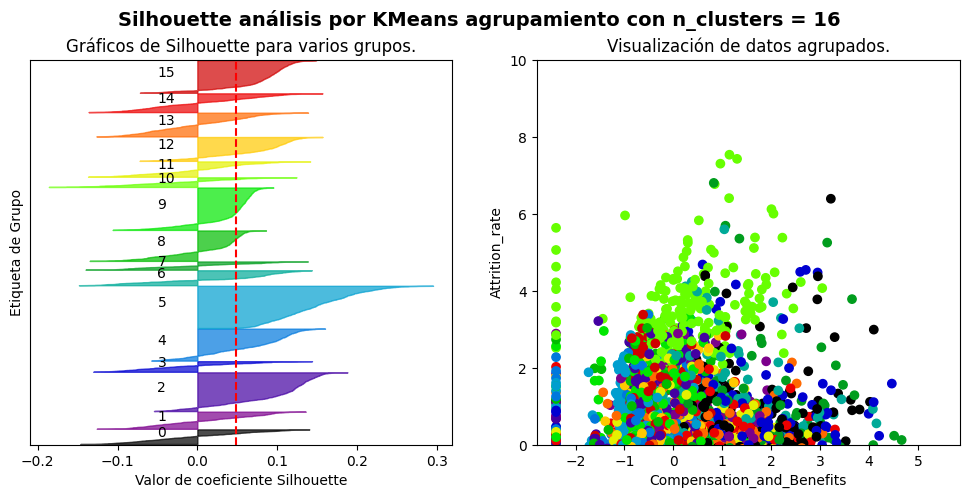

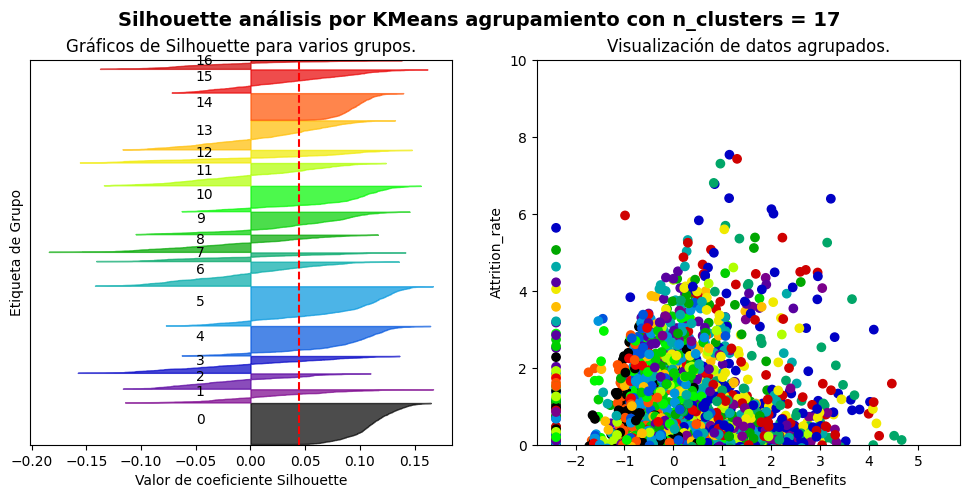

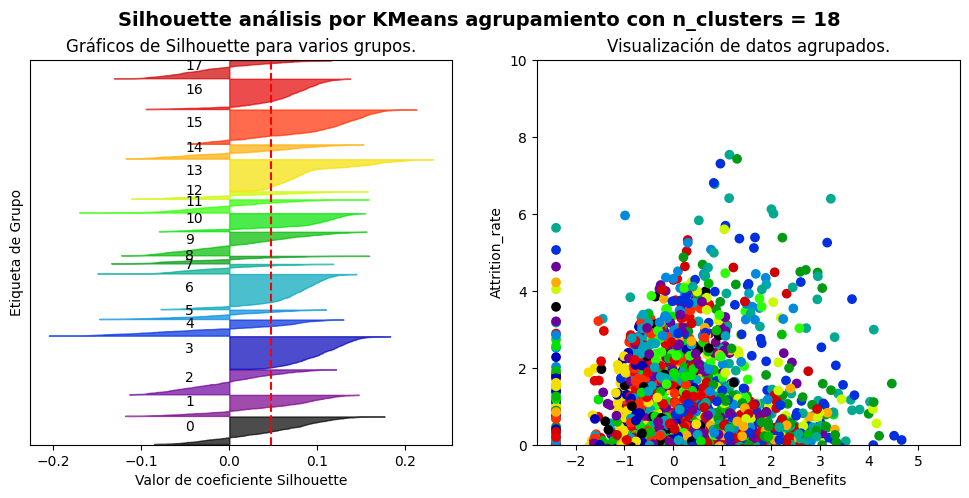

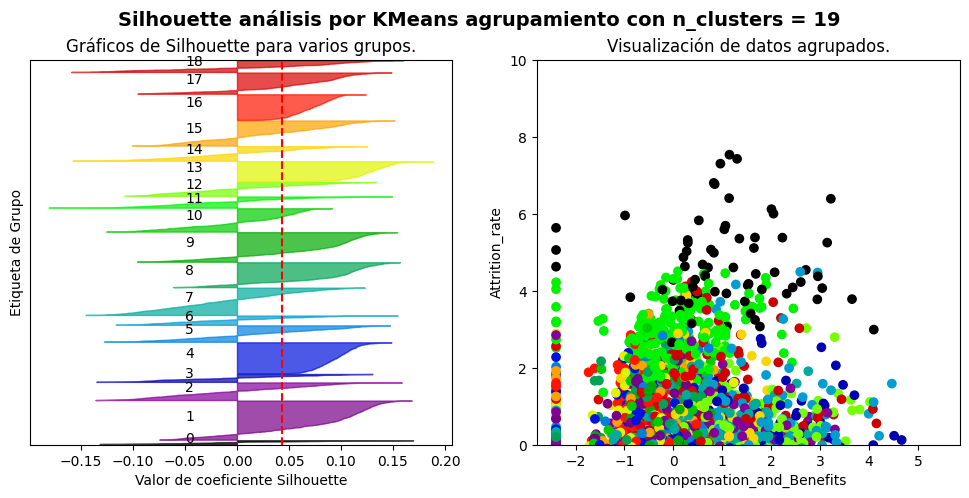

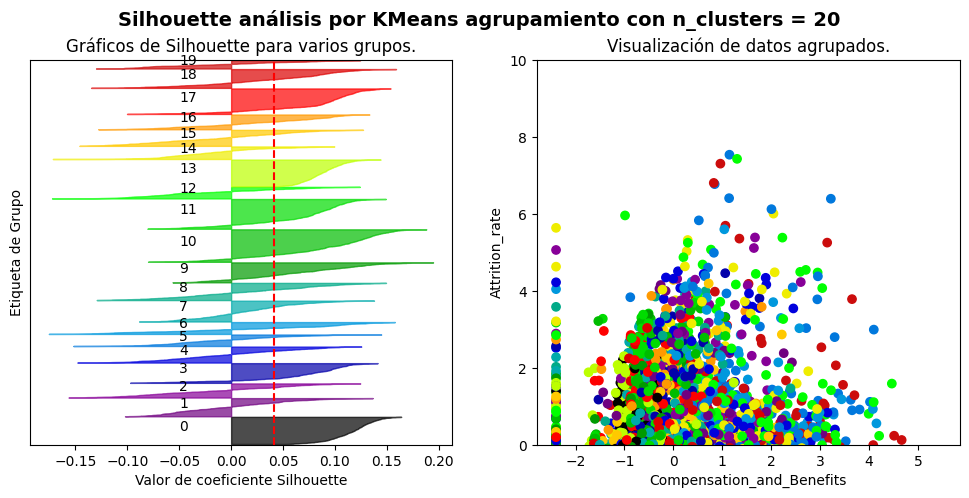

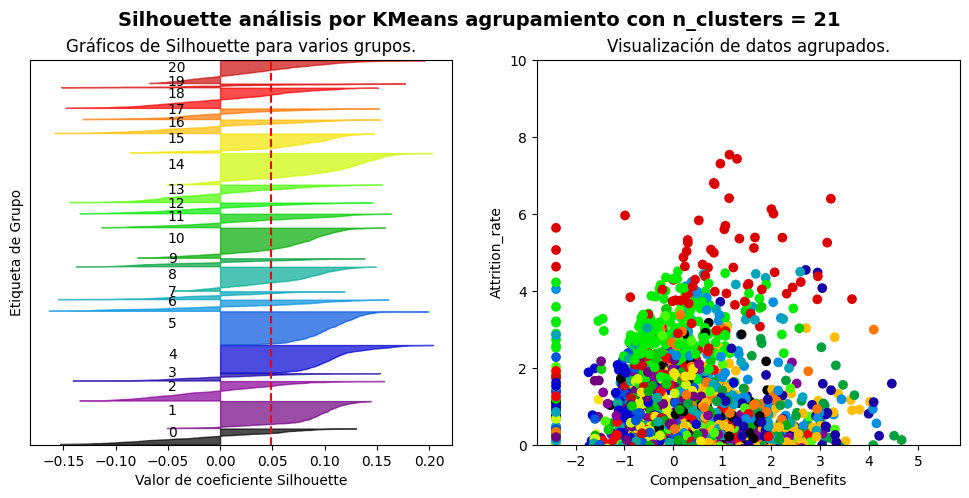

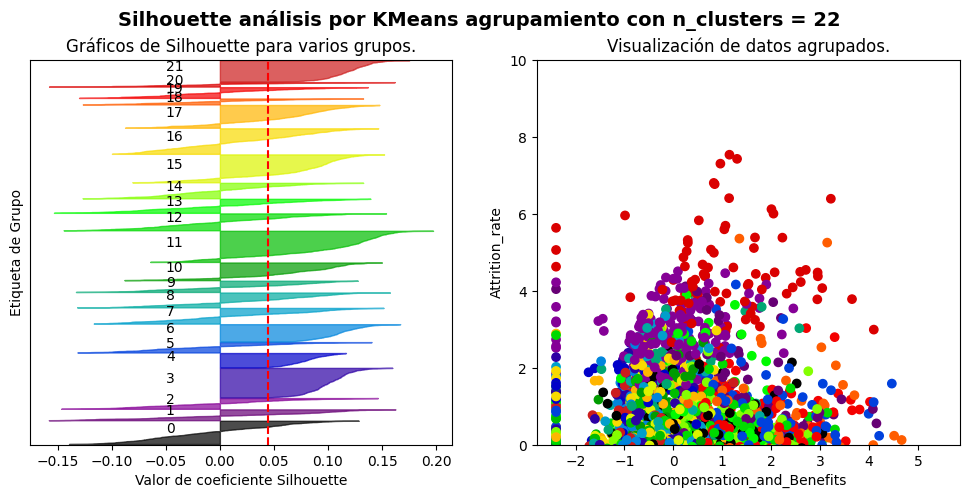

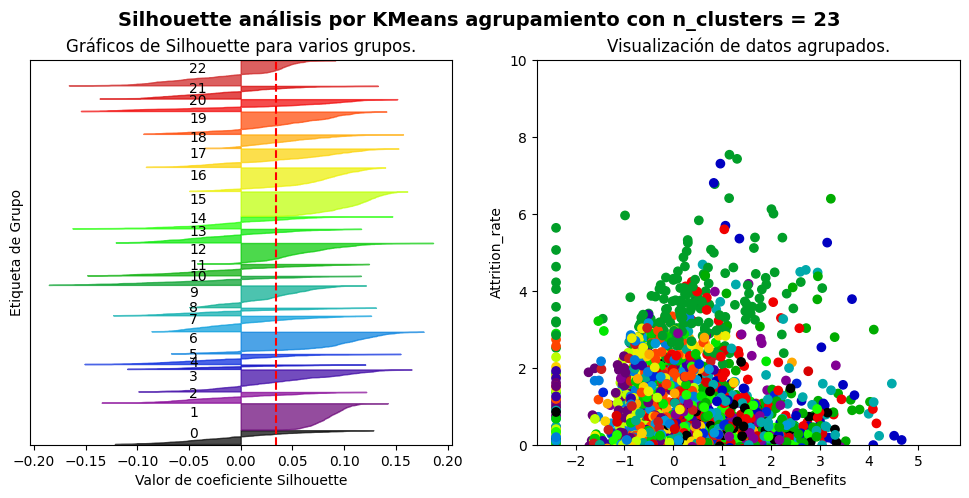

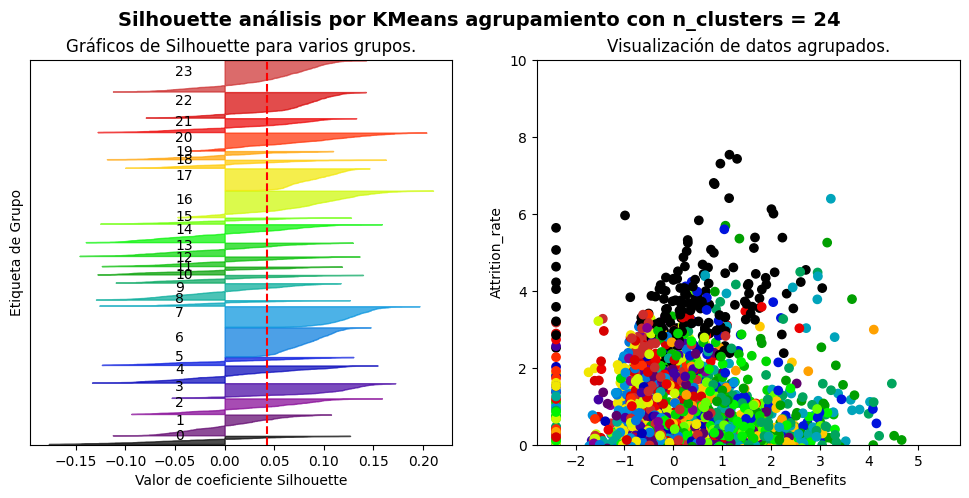

In [15]:
import matplotlib.cm as cm

X_train2 = X2

for k in range(2, nc):
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)

  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X_train2) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X_train2)
  silhouette_avg = metrics.silhouette_score(X_train2, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X_train2, y_pred)

  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax0.set_title("Gráficos de Silhouette para varios grupos.")
  ax0.set_xlabel("Valor de coeficiente Silhouette")
  ax0.set_ylabel("Etiqueta de Grupo")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks

  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X_train2[:, 11], X_train2[:, 20], c=colors)
  #ax1.scatter(X_train[:, f], X_train[:, 20], c=colors)
  ax1.set_ylim(0, 10)
  ax1.set_title("Visualización de datos agrupados.")
  #ax1.set_xlabel('Compensation_and_Benefits')
  ax1.set_xlabel(t)
  ax1.set_ylabel('Attrition_rate')

  plt.suptitle(("Silhouette análisis por KMeans agrupamiento con "
                "n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

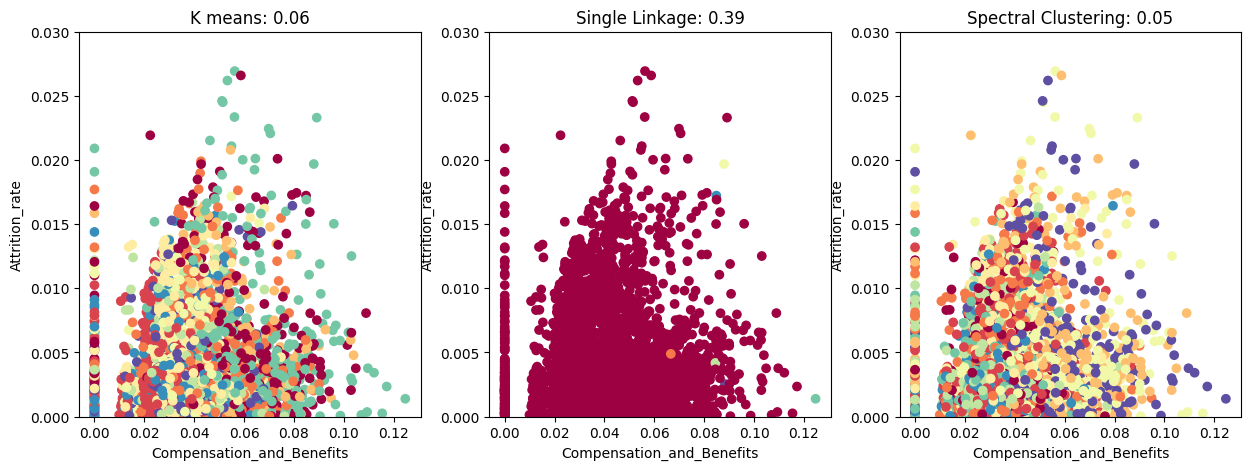

In [58]:
#Comparación relativa de distintos Algoritmos de Agrupamiento

k = 10  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X2)
s1 = metrics.silhouette_score(X2, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X2)
s2 = metrics.silhouette_score(X2, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X2)
s3 = metrics.silhouette_score(X2, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,5))

X_train3= X1
ax0.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0,0.03)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel(t)
ax0.set_ylabel('Attrition_rate')

ax1.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0,0.03)
ax1.set_xlabel(t)
ax1.set_ylabel('Attrition_rate')

ax2.scatter(X_train3[:, f], X_train3[:, 20], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0,0.03)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel(t)
ax2.set_ylabel('Attrition_rate')

plt.show()

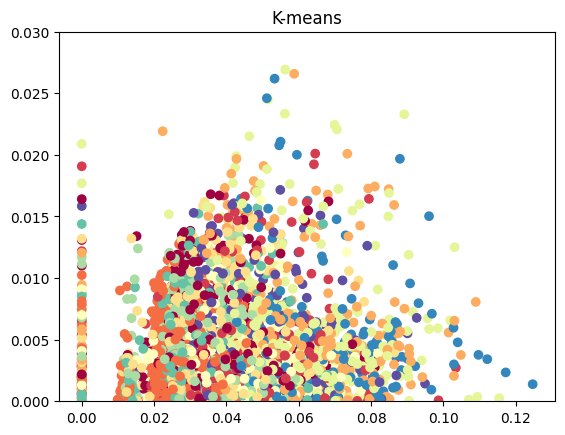

In [55]:

k = 11  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X2)
s1 = metrics.silhouette_score(X2, y_pred1)

plt.scatter(X1[:, f], X1[:, 20], c=y_pred1, cmap=plt.cm.Spectral)
plt.ylim(0, 0.03)
plt.title('K-means')
plt.show()

# Segmentación de los Datos

In [60]:
#Segmentación de los Datos
df3 = df2.copy(deep=True)

df3['groups'] = y_pred1
df3 = [df3[df3['groups']==g] for g in range(k)]
df3

[     Employee_ID Gender   Age  Education_Level Relationship_Status  \
 57     EID_15391      M  24.0                4             Married   
 61     EID_14177      M  34.0                2             Married   
 81     EID_15394      M  24.0                2             Married   
 89     EID_23579      M  22.0                1             Married   
 94     EID_10192      M  36.0                4             Married   
 ...          ...    ...   ...              ...                 ...   
 6944   EID_21167      M  25.0                2             Married   
 6964   EID_19222      M  19.0                4             Married   
 6976   EID_15099      M  28.0                4             Married   
 6990   EID_20545      M  22.0                4             Married   
 6994   EID_11159      M  33.0                3             Married   
 
          Hometown                    Unit Decision_skill_possess  \
 57    Springfield                 Quality             Behavioral   
 61     

In [61]:
for g in range(k):
    print('Group'+str(g),'has',len(df3[g]),'empleados.')

Group0 has 509 empleados.
Group1 has 1162 empleados.
Group2 has 714 empleados.
Group3 has 239 empleados.
Group4 has 1318 empleados.
Group5 has 447 empleados.
Group6 has 643 empleados.
Group7 has 500 empleados.
Group8 has 884 empleados.
Group9 has 584 empleados.


# Descripción de los grupos

In [80]:
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = df3[0].columns[:-1]
#grouped['Features'] = df3.columns[:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
    row = []
    for col in grouped['Features']:
        if df3[g][col].dtype != 'object':
            row.append(np.round(df3[g][col].mean(),2))
        else:
            row.append(df3[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped

Features     Group0      Group1     Group2      Group3  \
0                 Employee_ID  EID_11159    EID_1640  EID_11083   EID_18000   
1                      Gender          M           F          F           M   
2                         Age      28.27       54.25      30.99       27.99   
3             Education_Level        3.2         3.1       3.21        3.33   
4         Relationship_Status    Married     Married    Married      Single   
5                    Hometown    Lebanon     Lebanon    Lebanon     Lebanon   
6                        Unit         IT          IT         IT   Logistics   
7      Decision_skill_possess  Directive  Analytical  Directive  Behavioral   
8             Time_of_service       6.28       24.62       7.75        5.89   
9        Time_since_promotion       2.28        2.42       2.38        2.25   
10                growth_rate      32.58       61.28      39.88       31.12   
11                Travel_Rate       0.81         0.8       0.82        0.84   
12                 Post_Level       2.89         2.7       2.78        2.98   
13                  Pay_Scale       6.09        5.87       6.13        6.32   
14  Compensation_and_Benefits      type2       type2      type2       type2   
15          Work_Life_balance       2.41        2.27       2.47        2.44   
16                       VAR1       3.13        3.06       3.05        3.22   
17                       VAR2      -0.04        0.03       0.04        0.11   
18                       VAR3      -0.06        0.02       -0.1       -0.06   
19                       VAR4       1.91        1.86       1.93        1.94   
20                       VAR5       2.96        2.73       2.86        2.93   
21                       VAR6       7.17        7.01       7.15        7.28   
22                       VAR7       3.29        3.16       3.37        3.43   
23             Attrition_rate       0.21        0.18       0.19         0.2   

        Group4      Group5      Group6     Group7     Group8      Group9  
0    EID_12529   EID_17099    EID_8077  EID_16328  EID_19597    EID_4484  
1            F           M           F          F          F           F  
2        30.02       31.83       30.29      25.97      53.45       51.97  
3          3.2        3.24        3.14       3.38       3.14        3.16  
4      Married      Single      Single    Married    Married      Single  
5      Lebanon     Lebanon     Lebanon    Lebanon    Lebanon     Lebanon  
6           IT          IT          IT         IT         IT   Logistics  
7   Analytical  Analytical  Conceptual  Directive  Directive  Conceptual  
8         6.99        8.15        6.86       5.61      23.25       22.71  
9          2.3        2.28        2.34       2.28       2.53        2.44  
10       60.79       56.95       56.31      27.48      34.43        33.9  
11        0.82        0.78        0.84       0.85       0.81        0.84  
12        2.74        2.79         2.8        3.0       2.81         2.8  
13        5.85        5.97        6.07        6.2       6.09        5.99  
14       type2       type2       type2      type2      type2       type2  
15        2.36        2.38        2.37       2.47       2.44        2.39  
16        3.07        3.09         3.1       3.27       3.09         3.1  
17        0.08        0.08        0.02       0.08       0.14        -0.0  
18       -0.01        0.03        0.02      -0.04       0.03       -0.03  
19        1.89         1.9        1.91       1.94       1.89        1.92  
20        2.79        2.85        2.79       2.99       2.89        2.79  
21        7.07        7.12        7.04       7.24       7.14        7.05  
22        3.17        3.29        3.25       3.35       3.28        3.26  
23         0.2        0.19        0.19        0.2       0.17        0.19

# PCA

In [81]:
from sklearn.decomposition import PCA

X4 = PCA(n_components=11).fit_transform(X2)


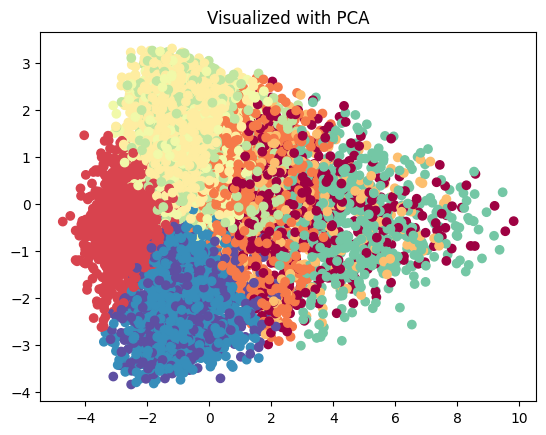

In [82]:
plt.scatter(X4[:, 0], X4[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with PCA')
plt.show()

In [83]:
print(X4)

[[ 1.44086054 -0.9324822  -1.66032671 ...  1.04956573 -0.5423713
   0.86070582]
 [ 2.57763145  0.53057978  3.05601838 ... -1.92250535 -1.61152714
   1.42265662]
 [-2.06835499 -1.30605297 -1.05927146 ... -0.36257757  0.90642108
  -0.01923935]
 ...
 [-1.54794965  0.46998943  0.17960511 ...  1.3356662  -0.97903635
  -1.16754338]
 [ 0.57593949 -2.94604867 -1.43809938 ... -0.4341699   0.713734
  -1.18812094]
 [-3.04955755  0.16719131 -0.95107046 ...  0.33069321  0.18217331
  -0.61779505]]


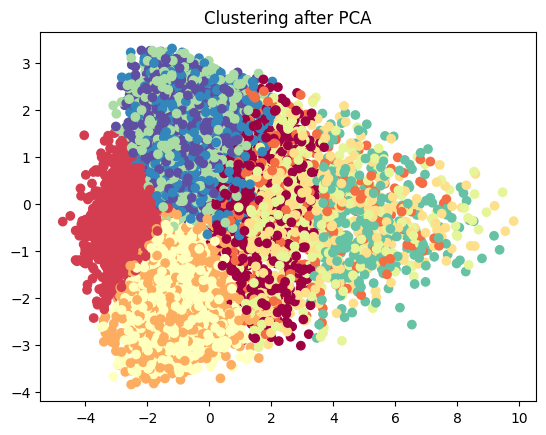

In [84]:
y_pca = cluster.KMeans(n_clusters=11).fit_predict(X4)

plt.scatter(X4[:, 0], X4[:, 1], c=y_pca, cmap=plt.cm.Spectral)
plt.title('Clustering after PCA')
plt.show()

In [87]:
df_pca = df2.copy(deep=True)
df_pca['groups'] = y_pca
dfs_pca = [df_pca[df_pca['groups']==g] for g in range(k)]

In [88]:
grouped_pca = pd.DataFrame()
grouped_pca['Features'] = df_pca.columns[:-1]
for g in range(k):
    row = []
    for col in grouped_pca['Features']:
        if dfs_pca[g][col].dtype != 'object':
            row.append(np.round(dfs_pca[g][col].mean(),2))
        else:
            row.append(dfs_pca[g][col].value_counts().keys()[0])
    grouped_pca['Group'+str(g)] = row
grouped_pca

Features      Group0      Group1      Group2      Group3  \
0                 Employee_ID   EID_11083    EID_1640   EID_17537    EID_4484   
1                      Gender           F           F           M           M   
2                         Age       31.99       54.69       28.68       53.28   
3             Education_Level        3.23        3.08        3.29        3.13   
4         Relationship_Status     Married     Married      Single     Married   
5                    Hometown     Lebanon     Lebanon     Lebanon     Lebanon   
6                        Unit          IT          IT   Logistics          IT   
7      Decision_skill_possess  Behavioral  Analytical  Conceptual  Conceptual   
8             Time_of_service        8.42       24.78         6.5       23.33   
9        Time_since_promotion        2.45        2.46        2.28        2.48   
10                growth_rate       37.25        63.1       32.51       35.74   
11                Travel_Rate        0.82         0.8        0.83         0.8   
12                 Post_Level        2.79        2.67        2.95         2.8   
13                  Pay_Scale        6.18        5.81        6.23        6.12   
14  Compensation_and_Benefits       type2       type2       type2       type2   
15          Work_Life_balance        2.45        2.26        2.47         2.4   
16                       VAR1        3.07        3.04        3.22        3.08   
17                       VAR2        0.03        0.03         0.1         0.1   
18                       VAR3       -0.09        0.01       -0.06         0.0   
19                       VAR4        1.92        1.87        1.92        1.91   
20                       VAR5        2.87        2.72        2.91        2.81   
21                       VAR6        7.14         7.0        7.23        7.09   
22                       VAR7        3.38        3.17        3.39        3.23   
23             Attrition_rate         0.2        0.18         0.2        0.19   

       Group4     Group5     Group6      Group7      Group8      Group9  
0   EID_11159  EID_19597  EID_18566    EID_8077   EID_16328   EID_12529  
1           M          F          F           F           F           M  
2       28.05       53.8      27.99       30.41       25.45       30.58  
3        3.23       3.18        3.3        3.17        3.38        3.18  
4     Married    Married     Single      Single     Married     Married  
5     Lebanon    Lebanon    Lebanon     Lebanon     Lebanon     Lebanon  
6          IT         IT         IT          IT          IT          IT  
7   Directive  Directive  Directive  Analytical  Analytical  Behavioral  
8        6.34      23.84       6.92        7.06        4.96        7.33  
9        2.31       2.46       2.36         2.3        2.21        2.25  
10      30.62      36.02      31.13       58.98       27.07       57.08  
11       0.82       0.82       0.82        0.82        0.87        0.87  
12       2.88       2.83       2.96         2.8        2.93        2.75  
13       6.04       6.04       6.08        6.04        6.18        5.92  
14      type2      type2      type2       type2       type2       type2  
15       2.43       2.39       2.52        2.35        2.46        2.38  
16       3.14        3.1       3.15        3.11        3.26        3.07  
17      -0.04       0.09       0.01        0.03         0.1        0.05  
18      -0.06       -0.0      -0.02        0.04       -0.08       -0.03  
19       1.93       1.88       1.92        1.92        1.94        1.88  
20       2.96       2.88       2.83        2.81        3.05        2.86  
21        7.2       7.13       7.22        7.05        7.16        7.07  
22       3.31        3.3       3.38        3.24        3.31        3.23  
23       0.21       0.18       0.19        0.19         0.2        0.21

# Feature importance

In [89]:
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[1:12]]
dfg

Features Gender    Age Education_Level Relationship_Status Hometown  \
Group0        M  28.27             3.2             Married  Lebanon   
Group1        F  54.25             3.1             Married  Lebanon   
Group2        F  30.99            3.21             Married  Lebanon   
Group3        M  27.99            3.33              Single  Lebanon   
Group4        F  30.02             3.2             Married  Lebanon   
Group5        M  31.83            3.24              Single  Lebanon   
Group6        F  30.29            3.14              Single  Lebanon   
Group7        F  25.97            3.38             Married  Lebanon   
Group8        F  53.45            3.14             Married  Lebanon   
Group9        F  51.97            3.16              Single  Lebanon   

Features       Unit Decision_skill_possess Time_of_service  \
Group0           IT              Directive            6.28   
Group1           IT             Analytical           24.62   
Group2           IT              Directive            7.75   
Group3    Logistics             Behavioral            5.89   
Group4           IT             Analytical            6.99   
Group5           IT             Analytical            8.15   
Group6           IT             Conceptual            6.86   
Group7           IT              Directive            5.61   
Group8           IT              Directive           23.25   
Group9    Logistics             Conceptual           22.71   

Features Time_since_promotion growth_rate Travel_Rate  
Group0                   2.28       32.58        0.81  
Group1                   2.42       61.28         0.8  
Group2                   2.38       39.88        0.82  
Group3                   2.25       31.12        0.84  
Group4                    2.3       60.79        0.82  
Group5                   2.28       56.95        0.78  
Group6                   2.34       56.31        0.84  
Group7                   2.28       27.48        0.85  
Group8                   2.53       34.43        0.81  
Group9                   2.44        33.9        0.84

In [92]:
import plotly.graph_objects as go
# Filter dfg to include only numeric columns
numeric_dfg = dfg.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

Xt = StandardScaler().fit_transform(numeric_dfg.to_numpy())
Xt = Xt + abs(np.min(Xt))
fig = go.Figure()
for j in range(len(numeric_dfg)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=numeric_dfg.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Variable mean per group',
    yaxis_title='normalized values',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [100]:
df3

[     Employee_ID Gender   Age  Education_Level Relationship_Status  \
 57     EID_15391      M  24.0                4             Married   
 61     EID_14177      M  34.0                2             Married   
 81     EID_15394      M  24.0                2             Married   
 89     EID_23579      M  22.0                1             Married   
 94     EID_10192      M  36.0                4             Married   
 ...          ...    ...   ...              ...                 ...   
 6944   EID_21167      M  25.0                2             Married   
 6964   EID_19222      M  19.0                4             Married   
 6976   EID_15099      M  28.0                4             Married   
 6990   EID_20545      M  22.0                4             Married   
 6994   EID_11159      M  33.0                3             Married   
 
          Hometown                    Unit Decision_skill_possess  \
 57    Springfield                 Quality             Behavioral   
 61     

In [102]:
house1 = df_pca.sort_values('groups')
groups = house1['groups']
house1 = house1[house1.columns[1:12]]

# Filter house1 to include only numeric columns before scaling
numeric_house1 = house1.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

Xt = StandardScaler().fit_transform(numeric_house1.to_numpy())
x = ['Group '+str(g) for g in groups]

fig = go.Figure()
for j in range(len(numeric_house1.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=numeric_house1.columns[j]
  ))
fig.update_layout(
    title='Variable boxplot grouped',
    yaxis_title='normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [17]:
#4.Selecciona el número de grupos adecuados para agrupar usando K-means
#a) Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
#b) Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

In [18]:
#5.Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
#a) Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [19]:
#6.Interpreta los resultados obtenidos:
#a) Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.
#b)Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.